/Users/manasshetty14/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/manasshetty14/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/manasshetty14/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


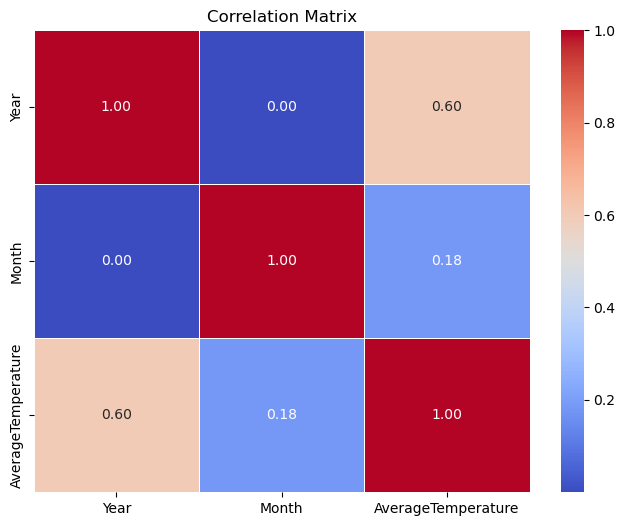

RMSE for existing data: 0.3497044983734235
Enter the years for which you want to predict temperatures (comma-separated): 2070

Future Year	Month	Predicted Temperature
2070		1		14.91°C
2070		2		15.66°C
2070		3		17.35°C
2070		4		19.45°C
2070		5		21.52°C
2070		6		22.77°C
2070		7		23.45°C
2070		8		23.39°C
2070		9		24.12°C
2070		10		20.04°C
2070		11		17.95°C
2070		12		15.32°C


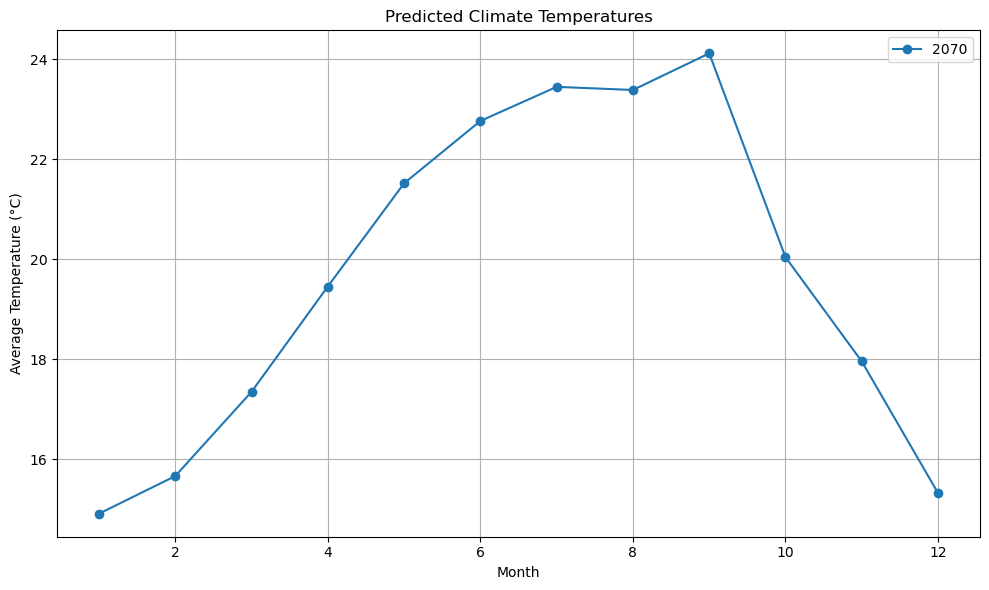

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("Temp.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'dt' column to datetime
data['dt'] = pd.to_datetime(data['dt'])

# Extract year and month from the datetime column
data['Year'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month

# Group data by year and month, calculate the mean temperature
data_grouped = data.groupby(['Year', 'Month'])['AverageTemperature'].mean().reset_index()

# Calculate correlation matrix
correlation_matrix = data_grouped.corr()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Split data into features and target variable
X = data_grouped[['Year', 'Month']]
y = data_grouped['AverageTemperature']

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Calculate RMSE for the existing model
y_pred = rf_model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE for existing data:", rmse)

# Function to predict temperatures for specific years entered by the user
def predict_temperatures(years):
    future_months = np.arange(1, 13)
    future_data = pd.DataFrame([(year, month) for year in years for month in future_months], columns=['Year', 'Month'])
    future_predictions_rf = rf_model.predict(future_data)
    return future_data, future_predictions_rf

# Take user input for the years
user_years = input("Enter the years for which you want to predict temperatures (comma-separated): ")
user_years = [int(year.strip()) for year in user_years.split(',')]

# Predict temperatures for the user input years
future_data, future_predictions_rf = predict_temperatures(user_years)

# Print future predictions
print("\nFuture Year\tMonth\tPredicted Temperature")
for year, month, temp in zip(future_data['Year'], future_data['Month'], future_predictions_rf):
    print(f"{year}\t\t{month}\t\t{temp:.2f}°C")

# Plot the predicted temperatures
plt.figure(figsize=(10, 6))
for year in user_years:
    plt.plot(future_data[future_data['Year'] == year]['Month'], future_predictions_rf[future_data['Year'] == year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title(f'Predicted Climate Temperatures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
